In [2]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from PIL import Image

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                image     label
0        images/train\angry\10002.png     angry
1        images/train\angry\10016.png     angry
2        images/train\angry\10037.png     angry
3        images/train\angry\10038.png     angry
4        images/train\angry\10052.png     angry
...                               ...       ...
28633  images/train\surprise\9969.png  surprise
28634  images/train\surprise\9985.png  surprise
28635  images/train\surprise\9990.png  surprise
28636  images/train\surprise\9992.png  surprise
28637  images/train\surprise\9996.png  surprise

[28638 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)

                               image     label
0        images/test\angry\32298.png     angry
1        images/test\angry\32303.png     angry
2        images/test\angry\32306.png     angry
3        images/test\angry\32312.png     angry
4        images/test\angry\32320.png     angry
...                              ...       ...
3633  images/test\surprise\35857.png  surprise
3634  images/test\surprise\35863.png  surprise
3635  images/test\surprise\35872.png  surprise
3636  images/test\surprise\35874.png  surprise
3637  images/test\surprise\35875.png  surprise

[3638 rows x 2 columns]


In [9]:
from tqdm.notebook import tqdm

In [10]:
from PIL import Image
import numpy as np
def extract_features(images):
        features = []
        for img_path in images:
            img = Image.open(img_path).resize((48, 48))  # Resize to 48x48
            img_array = np.array(img)
            features.append(img_array)
        features = np.array(features)
        features = features.reshape(len(features), 48, 48, 1)
        return features

In [11]:
train_features = extract_features(train['image'])

In [12]:
test_features = extract_features(test['image'])

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\RUTVI SALOT\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [20]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 40, validation_data = (x_test,y_test)) 

Epoch 1/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 220s 966ms/step - accuracy: 0.2413 - loss: 1.8398 - val_accuracy: 0.2416 - val_loss: 1.8487
Epoch 2/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 220s 980ms/step - accuracy: 0.2512 - loss: 1.8165 - val_accuracy: 0.2510 - val_loss: 1.8431
Epoch 3/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 223s 997ms/step - accuracy: 0.2569 - loss: 1.8008 - val_accuracy: 0.2771 - val_loss: 1.7651
Epoch 4/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 219s 978ms/step - accuracy: 0.2907 - loss: 1.7329 - val_accuracy: 0.3337 - val_loss: 1.6761
Epoch 5/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.3474 - loss: 1.6442 - val_accuracy: 0.4016 - val_loss: 1.5328
Epoch 6/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 222s 991ms/step - accuracy: 0.3968 - loss: 1.5508 - val_accuracy: 0.4426 - val_loss: 1.4388
Epoch 7/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 223s 996ms/step - accuracy: 0.4300 - loss: 1.4634 - val_accuracy: 0.4665 - val_loss: 1.3898
Epoch 8/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 222s 989ms/step - accuracy: 0.4488 - lo

In [21]:
model_json = model.to_json()
with open("emotiondetector2.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector2.h5")

In [22]:
from keras.models import model_from_json

In [23]:
json_file = open("emotiondetector2.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector2.h5")

In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [25]:
def ef(image):
    img = load_img(image,color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature

In [26]:
image = 'images\\train\\angry\\120.png'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
model prediction is  angry


In [27]:
image = 'images\\train\\disgust\\1265.png'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
model prediction is  disgust


In [28]:
image = 'images\\train\\fear\\21.png'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
model prediction is  fear


In [29]:
image = 'images\\train\\happy\\67.png'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
model prediction is  happy


In [30]:
image = 'images\\train\\surprise\\252.png'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
model prediction is  surprise


In [31]:
image = 'images\\train\\sad\\130.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
model prediction is  fear


In [32]:
pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
model prediction is  fear


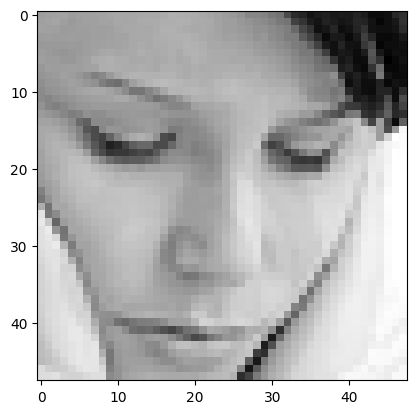

In [34]:
image = 'images\\train\\sad\\42.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
model prediction is  fear


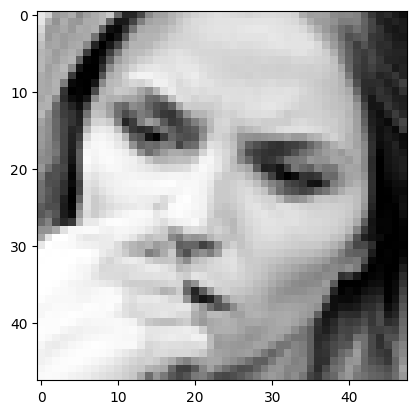

In [35]:
image = 'images//train//fear//2.png'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
model prediction is  angry


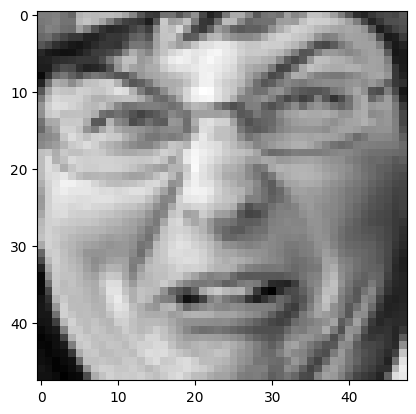

In [36]:
image = 'images/train/disgust/299.png'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
model prediction is  sad


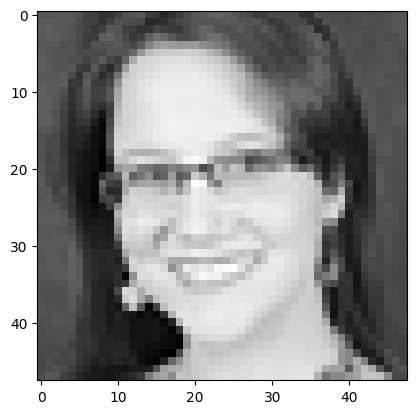

In [37]:
image = 'images/train/happy/7.png'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
model prediction is  fear


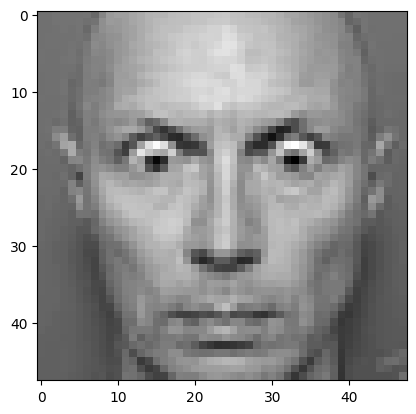

In [38]:
image = 'images/train/surprise/15.png'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')